# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import scipy as sc
import sympy as sp

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
output_directory = 'primal'

### Parameters

In [4]:
T = 1
dt = 0.1

In [5]:
infiltration_rate = 1e-3
extraction_rate = 0.3

In [6]:
S_s = 0.1
phi = 0.1

In [7]:
N = 10 # 16
quad_order = 1

In [8]:
abs_tol = 1e-5
rel_tol = 1e-5
max_iterations_per_step = 100

### Grid and $V_h$

In [9]:
# convert the grid into a mixed-dimensional grid
sd = pp.StructuredTriangleGrid([N, N], [1, 1])
sd.compute_geometry()
pg.convert_from_pp(sd)

In [10]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(sd, sd.face_centers[1, :] == 1, faces=True)

In [11]:
mdg = pg.as_mdg(sd)

In [12]:
subdomain, data = mdg.subdomains( return_data=True )[0]

In [13]:
key = "flow"

darcy_data = {}
initial_pressure = []

In [14]:
h_field     = pg.Lagrange1(key)
gamma_field = pg.Lagrange1(key)

In [15]:
subdomain, data = mdg.subdomains(return_data=True)[0]

In [16]:
def h_bc(x, t): return 1
def initial_h_func(x): return 1
def infiltration(x, t): return infiltration_rate

In [17]:
eta_mask = sd.nodes[1, :] == 1

In [18]:
dof_p = h_field.ndof(subdomain)

### Mapping

In [19]:
eta_var = sp.Symbol('eta', negative=False)
x3_var  = sp.Symbol('x3',  negative=False)
chi_expr = eta_var * x3_var
chi = sp.lambdify( [eta_var, x3_var], chi_expr.simplify(), 'numpy' )

chi_x3  = sp.lambdify( [eta_var, x3_var], sp.diff(chi_expr,  x3_var).simplify(), 'numpy' )
chi_eta = sp.lambdify( [eta_var, x3_var], sp.diff(chi_expr, eta_var).simplify(), 'numpy' )

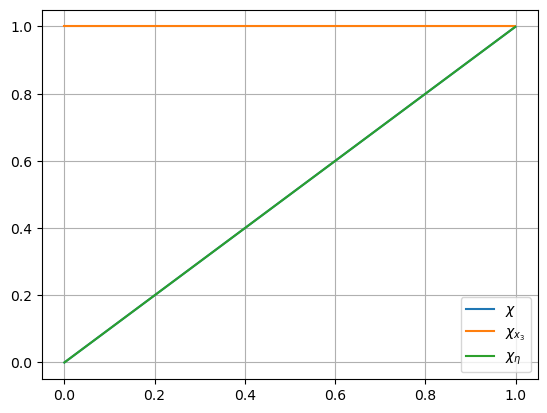

In [20]:
fig = plt.figure()
ax = fig.subplots(1,1)

ax.plot(np.arange(0., 1., 1/1000),     chi(np.ones(shape=(1000, )), np.arange(0., 1., 1/1000)))
ax.plot(np.arange(0., 1., 1/1000),  chi_x3(np.ones(shape=(1000, )), np.arange(0., 1., 1/1000)))
ax.plot(np.arange(0., 1., 1/1000), chi_eta(np.ones(shape=(1000, )), np.arange(0., 1., 1/1000)))

ax.legend(['$\chi$', '$\chi_{x_3}$', '$\chi_{\eta}$'])

ax.grid()

In [21]:
def convert_heights(eta_dofs, heights):
    if len(eta_dofs) == len(heights):
        return chi(eta_dofs, heights)
    else:
        return chi( np.tile(eta_dofs, ceil(len(heights) / len(eta_dofs))) , heights)

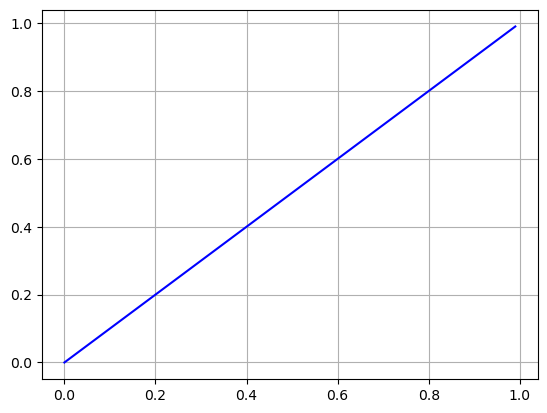

In [22]:
ax = plt.subplot(1,1,1)
ax.plot( np.arange(0, 1, 0.01), chi(1, np.arange(0, 1, 0.01)), 'b' )
ax.grid()

In [23]:
%%cython
import numpy as np

def find_ordering(coord: np.array):
    lx = np.argmin(coord[0, :])
    rx = np.argmax(coord[0, :])
    mx = np.setdiff1d(np.array([0,1,2]), np.array([lx, rx]))[0]

    # Vertical Alignment
    if np.abs( coord[0, lx] - coord[0, mx] ) < 1e-7:
        # lx and mx vertical aligned, rx no
        up =   lx if np.argmax(coord[1, np.array([lx, mx])]) == 0 else mx
        down = lx if np.argmin(coord[1, np.array([lx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, rx] ) < 1e-7:
            return [up, down, rx]
        else:
            return [down, rx, up]
    else:
        # rx and mx vertical aligned, lx no
        up =   rx if np.argmax(coord[1, np.array([rx, mx])]) == 0 else mx
        down = rx if np.argmin(coord[1, np.array([rx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, lx] ) < 1e-7:
            return [up, lx, down]
        else:
            return [down, up, lx]

In [24]:
def compute_eta_x3(base_height: float, element_height: float, m, ls_eta, rs_eta, x, y):
    coord = lambda t: ((m+1) * (1-t) - (m-1) * t) / 2

    return (1-coord(y)) * ls_eta + coord(y) * rs_eta, base_height + coord(x) * element_height

In [25]:
def chi_x3_eta_gen( base_height: float, element_height: float, m, ls_eta, rs_eta, x, y ):
    eta, x3 = compute_eta_x3(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return chi_x3(eta, x3), chi_eta(eta, x3)

In [26]:
def K_func_eval(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, x, y):
    chi_x3, chi_eta = chi_x3_eta_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)

    return np.array([[             chi_x3,                            -chi_eta * grad_eta],
                     [-chi_eta * grad_eta, (1 + np.power(chi_eta * grad_eta, 2)) / chi_x3]])

    # This is the full version:
    #return np.array([[                  chi_x3 * k11,                                                   k12 - chi_eta * grad_eta * k11],
    #                 [k21 - chi_eta * grad_eta * k11, ( k22 + chi_eta * grad_eta * ( chi_eta * grad_eta * k11 - k12 - k21 ) ) / chi_x3]])

### BC

##### Dirichlet (essential)

In [27]:
dirichlet_flag = sd.nodes[0, :] == 1

In [28]:
dirichlet_value = np.array(dirichlet_flag, dtype=float)

##### Neumann (natural)

In [29]:
def neumann_cond(ls_eta):
    rows = []
    cols = []
    data = []

    faces = np.where(subdomain.face_centers[0, :] == 0)[0]
    for edge_id in faces:
        nodes = subdomain.face_nodes.indices[subdomain.face_nodes.indptr[edge_id]:subdomain.face_nodes.indptr[edge_id+1]]
        
        for node, func in zip(nodes, [(lambda y: 1-y), (lambda y: y)]):
            tmp = 1/2 #integrate.fixed_quad( lambda y : chi_x3(ls_eta, subdomain.nodes[1, nodes[0]] + y) * func(y), 0, 1, n=5)[0]

            rows.append(node)
            data.append(-extraction_rate * tmp / N)
            cols.append(0)
    
    return sps.coo_array((data, (rows, cols)), shape=(subdomain.num_nodes, 1), dtype=float).todense()[:, 0]

### Matrix Assembly

In [30]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= N

#### Stifness

In [31]:
def local_A(coord, sign, ls_eta, rs_eta, grad_eta):
    M = np.zeros(shape=(3,3))

    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]
    
    J_T_1_T = np.array([[x2[1]-x0[1], x0[1]-x1[1]],
                        [x0[0]-x2[0], x1[0]-x0[0]]]) / ((x1[0]-x0[0]) * (x2[1]-x0[1]) - (x2[0]-x0[0]) * (x1[1]-x0[1]))
    

    q_funcs = [J_T_1_T @ np.array([-1, -1]), J_T_1_T @ np.array([ 1, 0]), J_T_1_T @ np.array([0,  1])]

    base_height = np.min(coord[1,:])
    base_width  = np.min(coord[0, :])

    element_height = (np.max(coord[1, :]) - np.min(coord[1, :]))
    element_width  = (np.max(coord[0, :]) - np.min(coord[0, :]))


    K_local = lambda x,y: K_func_eval(base_height, base_width,
                     element_height, element_width,
                     np.prod(sign),
                     ls_eta, rs_eta, grad_eta, x, y)
    
    area = element_height * element_width

    if quad_order > 1:
        for i in range(3):
            for j in range(3):
                integrand = lambda ys,x: np.array([q_funcs[j].T @ K_local(x, y) @ q_funcs[i] for y in np.array(ys)])
                inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
                M[ordering[i], ordering[j]] = integrate.fixed_quad(inside, 0, 1, n=quad_order, args=(quad_order,))[0] * area
    else:
        for i in range(3):
            for j in range(3):
                M[ordering[i], ordering[j]] = q_funcs[j].T @ K_local(1/3, 1/3) @ q_funcs[i] * area / 2

    return M

In [32]:
local_A(np.array([[0, 1, 0], [0, 0, 1]]), np.array([-1, 1, -1]), 1, 1, 0)

array([[ 1. , -0.5, -0.5],
       [-0.5,  0.5,  0. ],
       [-0.5,  0. ,  0.5]])

In [33]:
def stifness(eta_dofs):

    grad_eta   = eta_diff @ eta_dofs

    # Map the domain to a reference geometry (i.e. equivalent to compute
    # surface coordinates in 1d and 2d)

    _, _, sign = sps.find(subdomain.cell_faces)
    _, _, _, _, dim, node_coords = pp.map_geometry.map_grid(sd)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.
    size = np.power(sd.dim + 1, 2) * sd.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    cell_nodes = sd.cell_nodes()

    for c in np.arange(sd.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < sd.cell_centers[0, c] ))

        # Compute the stiff-H1 local matrix
        A = local_A(coord_loc, sign[loc], eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell])

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))
        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [34]:
stifness(np.ones_like(boundary_grid.nodes[1, :])).todense()

matrix([[ 1. , -0.5,  0. , ...,  0. ,  0. ,  0. ],
        [-0.5,  2. , -0.5, ...,  0. ,  0. ,  0. ],
        [ 0. , -0.5,  2. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 0. ,  0. ,  0. , ...,  2. , -0.5,  0. ],
        [ 0. ,  0. ,  0. , ..., -0.5,  2. , -0.5],
        [ 0. ,  0. ,  0. , ...,  0. , -0.5,  1. ]])

#### Mass matrices

In [35]:
def local_mass(coord, chi_x3_func_gen, ls_eta, rs_eta, m):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,3))

    base_height = np.min(coord[1, :])
    element_height = np.max(coord[1, :]) - base_height

    chi_x3 = lambda x,y: chi_x3_func_gen(base_height, element_height, m, ls_eta, rs_eta, x, y)[0]

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([qs[j](x,y) * qs[i](x,y) * chi_x3(x, y) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

            M[ ordering[i], ordering[j] ] = tmp * jacobian

    return M

In [36]:
local_mass(np.array([[0, 1, 0], [0, 0, 1]]), chi_x3_eta_gen, 1, 1, 1)

array([[0.08333333, 0.04166667, 0.04166667],
       [0.04166667, 0.08333333, 0.04166667],
       [0.04166667, 0.04166667, 0.08333333]])

In [37]:
def global_mass(eta_dofs):
    
    size = np.power(subdomain.dim + 1, 2) * subdomain.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(subdomain)

    # Allocate the data to store matrix entries, that's the most efficient
    # way to create a sparse matrix.

    cell_nodes = subdomain.cell_nodes()
    _, _, sign = sps.find(subdomain.cell_faces)
        
    for c in np.arange(subdomain.num_cells):
        # For the current cell retrieve its nodes
        loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

        nodes_loc = cell_nodes.indices[loc]
        coord_loc = node_coords[:, nodes_loc]

        # Compute the stiff-H1 local matrix
            
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < subdomain.cell_centers[0, c] ))

        A = local_mass(coord_loc, chi_x3_eta_gen, eta_dofs[eta_cell], eta_dofs[eta_cell+1], np.prod(sign[loc]))

        # Save values for stiff-H1 local matrix in the global structure
        cols = np.tile(nodes_loc, (nodes_loc.size, 1))

        loc_idx = slice(idx, idx + cols.size)
        rows_I[loc_idx] = cols.T.ravel()
        cols_J[loc_idx] = cols.ravel()
        data_IJ[loc_idx] = A.ravel()
        idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

In [38]:
M_gamma = gamma_field.assemble_mass_matrix( boundary_grid )
M_h = h_field.assemble_mass_matrix(subdomain)

#### Restrictor matrices

In [39]:
restrict_eta = np.array(eta_mask, dtype=float)
restrict_eta = sps.csr_matrix(np.diag(restrict_eta, k=0))

In [40]:
upscale_to_h = np.zeros(shape=(sd.num_nodes, boundary_grid.num_nodes))
upscale_to_h[ eta_mask , np.arange(boundary_grid.num_nodes) ] = 1
upscale_to_h = sps.csr_matrix(upscale_to_h)

In [41]:
proj_psi = h_field.eval_at_cell_centers(subdomain)

### Solve System

In [42]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [43]:
# Fixed rhs
fixed_rhs = np.zeros(dof_p)

In [44]:
# Initial conditions
sol = [h_field.interpolate(sd, initial_h_func)]

In [45]:
def save_step(sol, saver, i):
    ins = list()

    ins.append((sd, "cell_h", proj_psi @ sol))

    saver.write_vtu(ins, time_step=i)

In [46]:
# Save the initial solution
saver = pp.Exporter(mdg, 'sol', folder_name=output_directory)
save_step(sol[-1], saver, 0)

In [47]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [48]:
# Time Loop
for i in range(1, int(T/dt)+1):
    print('Time ' + str(i * dt))
    current_time = i * dt

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()

    # Prepare the rhs
    time_rhs = fixed_rhs.copy()

    debug_saver = pp.Exporter(mdg, str(i) + '_sol', folder_name=os.path.join(output_directory, 'debug'))
    save_step(sol[-1], debug_saver, 0)
    
    # Assemble the saddle point problem
    mass_tn = global_mass(prev[eta_mask])
    time_rhs += S_s / dt * mass_tn @ sol[-1]

    # Non-linear loop
    for k in range(max_iterations_per_step):
        A_h = stifness(prev[eta_mask])  #h_field.assemble_stiff_matrix(subdomain, data)

        # Assemble the saddle point problem
        glob_mass = global_mass(prev[eta_mask])
        spp = sps.csr_matrix(S_s / dt * glob_mass + phi / dt * upscale_to_h @ M_gamma @ upscale_to_h.T + A_h)

        # Prepare the solver
        rhs = time_rhs.copy()
        rhs +=  (phi / dt * upscale_to_h @ M_gamma @ sol[-1][eta_mask] + upscale_to_h @ M_gamma @ gamma_field.interpolate( boundary_grid, lambda x: infiltration(x, current_time) ) + neumann_cond(prev[eta_mask][0])) #/ prev[eta_mask][0]
        
        ls = pg.LinearSystem(spp, rhs)
        ls.flag_ess_bc(dirichlet_flag, dirichlet_value)

        current = ls.solve()

        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        rel_err_psi  = np.sqrt( (current - prev).T @ M_h @ (current - prev) )
        abs_err_prev = np.sqrt( prev.T @ M_h @ prev )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(rel_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )

        save_step(current, debug_saver, k+1)
        
        if rel_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')
    sol.append( current.copy() )
    save_step(sol[-1], saver, i)

    export_name = os.path.join(csv_base, str(i) + '.csv')

    with open( export_name, 'w' ) as file:

        file.write('x,y,h,p\n')

        et = np.tile(sol[-1][eta_mask], ceil(subdomain.num_nodes / boundary_grid.num_nodes))
        for x,y,h,p in zip( subdomain.nodes[0, :], subdomain.nodes[1, :] * et, sol[-1], sol[-1] - subdomain.nodes[1, :] * et):
            file.write(f'{x},{y},{h},{p}\n')

saver.write_pvd([t * dt for t in range(int(T/dt)+1)])

Time 0.1
Iteration #001, error L2 relative psi:    0.101948317
Iteration #002, error L2 relative psi:    0.011640096
Iteration #003, error L2 relative psi:    0.002560877
Iteration #004, error L2 relative psi:    0.000257116
Iteration #005, error L2 relative psi:    0.000015493

Time 0.2


Iteration #001, error L2 relative psi:    0.049302260
Iteration #002, error L2 relative psi:    0.006367547
Iteration #003, error L2 relative psi:    0.001100586
Iteration #004, error L2 relative psi:    0.000048026
Iteration #005, error L2 relative psi:    0.000008944

Time 0.30000000000000004
Iteration #001, error L2 relative psi:    0.027971051
Iteration #002, error L2 relative psi:    0.003349563
Iteration #003, error L2 relative psi:    0.000554174
Iteration #004, error L2 relative psi:    0.000026685
Iteration #005, error L2 relative psi:    0.000009720

Time 0.4
Iteration #001, error L2 relative psi:    0.016228244
Iteration #002, error L2 relative psi:    0.001813095
Iteration #003, error L2 relative psi:    0.000302562
Iteration #004, error L2 relative psi:    0.000022247
Iteration #005, error L2 relative psi:    0.000007359

Time 0.5
Iteration #001, error L2 relative psi:    0.009388049
Iteration #002, error L2 relative psi:    0.001007517
Iteration #003, error L2 relative ps

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


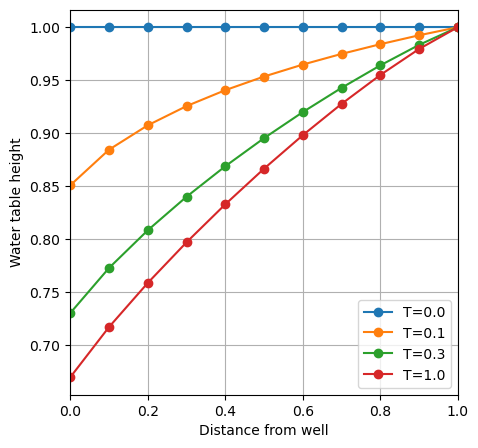

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))


#ax.set_ylim(0.65, 1.01)
ax.set_xlim(0, 1)

ax.plot( boundary_grid.nodes[0, :],  sol[0][eta_mask], 'o-' )
ax.plot( boundary_grid.nodes[0, :],  sol[1][eta_mask], 'o-')
ax.plot( boundary_grid.nodes[0, :],  sol[3][eta_mask], 'o-' )
ax.plot( boundary_grid.nodes[0, :], sol[-1][eta_mask], 'o-' )

ax.set_xlabel('Distance from well')
ax.set_ylabel('Water table height')

ax.legend(['T=0.0', 'T=0.1', 'T=0.3', 'T=1.0'])

ax.grid()
plt.savefig('moving_darcy_original.eps', format='eps')

In [50]:
sol[1][eta_mask]

array([0.85085947, 0.88446643, 0.90747524, 0.92557189, 0.94060696,
       0.95347891, 0.96475246, 0.97482396, 0.98397632, 0.99237934,
       1.        ])